In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


C:\Users\phonehouse\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('Dilute_Solute_Diffusion_with_features.csv')
data.head()

,Material compositions 1,Material compositions 2,Enorm (eV),E_raw (eV),Site2_MeltingT,Site1_MendeleevNumber,Site1_MiracleRadius,GSestFCClatcnt_max_value,Site2_BCCenergy_pa,Site1_BCCfermi,...,BCCenergy_pa_composition_average,MiracleRadius_min_value,MeltingT_min_value,NUnfilled_max_value,Site2_Group,Site1_CovalentRadii,Site2_NUnfilled,SpecificHeatCapacity_difference,Site1_Electronegativity,BCCenergy_pa_arithmetic_average
0,Ag,Ag,0.000000,1.824450,-0.531814,0.402504,0.263045,-0.626925,1.021337,-1.217816,...,1.386573,0.859808,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-1.057898,0.099471,1.386573
1,Ag,Co,-0.090142,1.734308,0.064051,0.402504,0.263045,-0.626925,-0.248457,-1.217816,...,0.484851,-0.730180,-0.046109,-0.801582,0.116318,0.690287,-0.391288,-0.388610,0.099471,0.484851
2,Ag,Cr,0.259139,2.083589,0.524584,0.402504,0.263045,-0.626925,-1.000991,-1.217816,...,-0.049547,-0.311762,-0.046109,0.315885,-0.649128,0.690287,0.576260,-0.287857,0.099471,-0.049547
3,Ag,Cu,-0.022200,1.802250,-0.394504,0.402504,0.263045,-0.626925,0.746249,-1.217816,...,1.191224,-0.646497,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-0.518150,0.099471,1.191224
4,Ag,Fe,0.317672,2.142122,0.112116,0.402504,0.263045,-0.626925,-0.637552,-1.217816,...,0.208542,-0.730180,-0.046109,-0.429093,-0.138831,0.690287,-0.068772,-0.287857,0.099471,0.208542


In [3]:
data.columns

Index(['Material compositions 1', 'Material compositions 2', 'Enorm (eV)',
       'E_raw (eV)', 'Site2_MeltingT', 'Site1_MendeleevNumber',
       'Site1_MiracleRadius', 'GSestFCClatcnt_max_value', 'Site2_BCCenergy_pa',
       'Site1_BCCfermi', 'CovalentRadius_max_value', 'Site2_Density',
       'n_ws^third_min_value', 'Site1_HHIr', 'IonicRadii_max_value',
       'BoilingT_max_value', 'valence_arithmetic_average', 'Site2_NdUnfilled',
       'Site1_IonicRadii', 'BCCenergy_pa_composition_average',
       'MiracleRadius_min_value', 'MeltingT_min_value', 'NUnfilled_max_value',
       'Site2_Group', 'Site1_CovalentRadii', 'Site2_NUnfilled',
       'SpecificHeatCapacity_difference', 'Site1_Electronegativity',
       'BCCenergy_pa_arithmetic_average'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Material compositions 1           408 non-null    object 
 1   Material compositions 2           408 non-null    object 
 2   Enorm (eV)                        408 non-null    float64
 3   E_raw (eV)                        408 non-null    float64
 4   Site2_MeltingT                    408 non-null    float64
 5   Site1_MendeleevNumber             408 non-null    float64
 6   Site1_MiracleRadius               408 non-null    float64
 7   GSestFCClatcnt_max_value          408 non-null    float64
 8   Site2_BCCenergy_pa                408 non-null    float64
 9   Site1_BCCfermi                    408 non-null    float64
 10  CovalentRadius_max_value          408 non-null    float64
 11  Site2_Density                     408 non-null    float64
 12  n_ws^thi

In [5]:
x1 = data['Material compositions 1'].unique()
x2 = data['Material compositions 2'].unique()

print(x1)
print(x2)

count = 0
for i in x1:
    count +=1
    
print(count)
    

['Ag' 'Al' 'Au' 'Ca' 'Cu' 'Fe' 'Ir' 'Mg' 'Mo' 'Ni' 'Pb' 'Pd' 'Pt' 'W' 'Zr']
['Ag' 'Co' 'Cr' 'Cu' 'Fe' 'Mn' 'Ni' 'Sc' 'Ti' 'V' 'Zn' 'Al' 'As' 'Au' 'Bi'
 'Ca' 'Cd' 'Ce' 'Er' 'Ga' 'Ge' 'Hf' 'Hg' 'In' 'Ir' 'La' 'Mg' 'Mo' 'Na'
 'Nb' 'Nd' 'Os' 'P' 'Pb' 'Pd' 'Pt' 'Re' 'Rh' 'Ru' 'S' 'Sb' 'Se' 'Si' 'Sn'
 'Ta' 'Tc' 'Te' 'Tl' 'W' 'Y' 'Zr' 'Be' 'Gd' 'K' 'Li' 'Pr' 'Sr' 'Th']
15


In [6]:
data_grp = data.groupby(['Material compositions 1'])
data_grp.get_group('Ag')

,Material compositions 1,Material compositions 2,Enorm (eV),E_raw (eV),Site2_MeltingT,Site1_MendeleevNumber,Site1_MiracleRadius,GSestFCClatcnt_max_value,Site2_BCCenergy_pa,Site1_BCCfermi,...,BCCenergy_pa_composition_average,MiracleRadius_min_value,MeltingT_min_value,NUnfilled_max_value,Site2_Group,Site1_CovalentRadii,Site2_NUnfilled,SpecificHeatCapacity_difference,Site1_Electronegativity,BCCenergy_pa_arithmetic_average
0,Ag,Ag,0.000000,1.824450,-0.531814,0.402504,0.263045,-0.626925,1.021337,-1.217816,...,1.386573,0.859808,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-1.057898,0.099471,1.386573
1,Ag,Co,-0.090142,1.734308,0.064051,0.402504,0.263045,-0.626925,-0.248457,-1.217816,...,0.484851,-0.730180,-0.046109,-0.801582,0.116318,0.690287,-0.391288,-0.388610,0.099471,0.484851
2,Ag,Cr,0.259139,2.083589,0.524584,0.402504,0.263045,-0.626925,-1.000991,-1.217816,...,-0.049547,-0.311762,-0.046109,0.315885,-0.649128,0.690287,0.576260,-0.287857,0.099471,-0.049547
3,Ag,Cu,-0.022200,1.802250,-0.394504,0.402504,0.263045,-0.626925,0.746249,-1.217816,...,1.191224,-0.646497,-0.046109,-1.546561,0.626615,0.690287,-1.036320,-0.518150,0.099471,1.191224
4,Ag,Fe,0.317672,2.142122,0.112116,0.402504,0.263045,-0.626925,-0.637552,-1.217816,...,0.208542,-0.730180,-0.046109,-0.429093,-0.138831,0.690287,-0.068772,-0.287857,0.099471,0.208542
5,Ag,Mn,0.202186,2.026636,-0.214281,0.402504,0.263045,-0.626925,-0.811899,-1.217816,...,0.084733,-0.144395,-0.046109,-0.056604,-0.393979,0.690287,0.253744,-0.176309,0.099471,0.084733
6,Ag,Ni,0.250571,2.075021,0.019339,0.402504,0.263045,-0.626925,0.210847,-1.217816,...,0.811018,-0.646497,-0.046109,-1.174071,0.371466,0.690287,-0.713804,-0.305849,0.099471,0.811018
7,Ag,Sc,-0.001431,1.823019,0.115469,0.402504,0.263045,0.294637,-0.007621,-1.217816,...,0.655877,0.859808,-0.046109,1.433353,-1.414574,0.690287,1.543809,0.140343,0.099471,0.655877
8,Ag,Ti,0.164968,1.989418,0.257430,0.402504,0.263045,-0.564887,-0.451494,-1.217816,...,0.340668,0.692440,-0.046109,1.060864,-1.159425,0.690287,1.221293,-0.021581,0.099471,0.340668
9,Ag,V,0.248163,2.072613,0.527937,0.402504,0.263045,-0.626925,-0.832421,-1.217816,...,0.070160,0.022972,-0.046109,0.688375,-0.904276,0.690287,0.898777,-0.143924,0.099471,0.070160


79.7


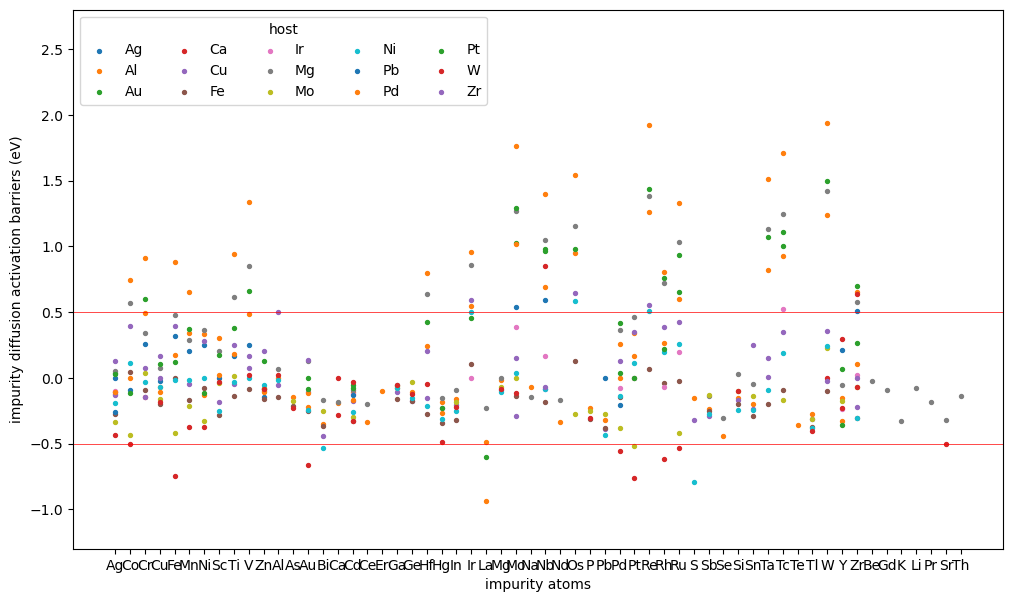

In [7]:
plt.figure(figsize=(12,7))
for atom in x1:
    df = data_grp.get_group(atom)
    plt.scatter(df['Material compositions 2'], df['Enorm (eV)'], label=atom, s=8)
    
plt.xlabel('impurity atoms')
plt.ylabel('impurity diffusion activation barriers (eV)')
plt.ylim(-1.3,2.8)
plt.axhline(y=0.5, c='red', linewidth=0.5)
plt.axhline(y=-0.5, c='red', linewidth=0.5)
plt.legend(title='host', loc='upper left', ncol=5)

percent = data.loc[(data['Enorm (eV)']>=-0.5) & (data['Enorm (eV)']<=0.5), 'Enorm (eV)'].count()

print(round(percent/data.shape[0]*100, 1))

plt.show()

In [8]:
data_new = data.drop(['Material compositions 1', 'Material compositions 2', 'E_raw (eV)'], axis=1)
data_new.shape

(408, 26)

<AxesSubplot:>

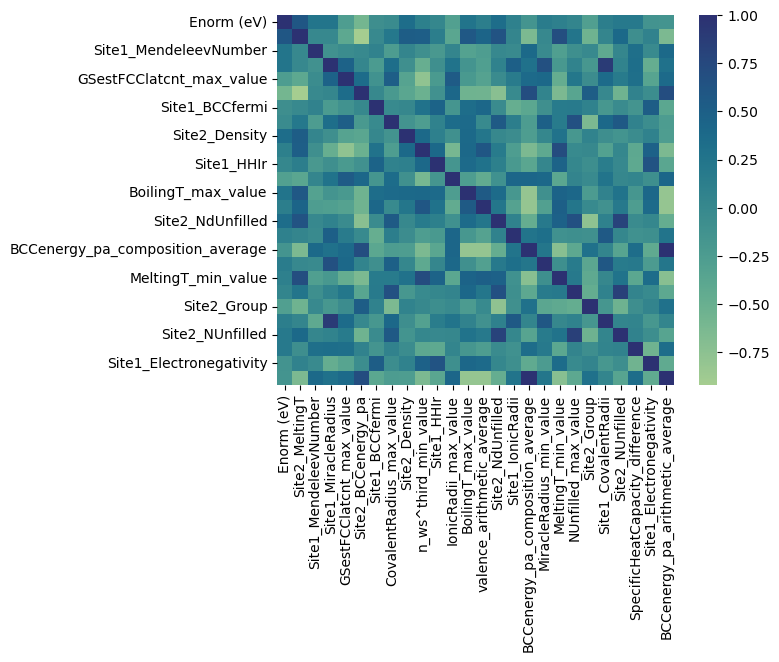

In [9]:
sns.heatmap(data_new.corr(), cmap='crest')

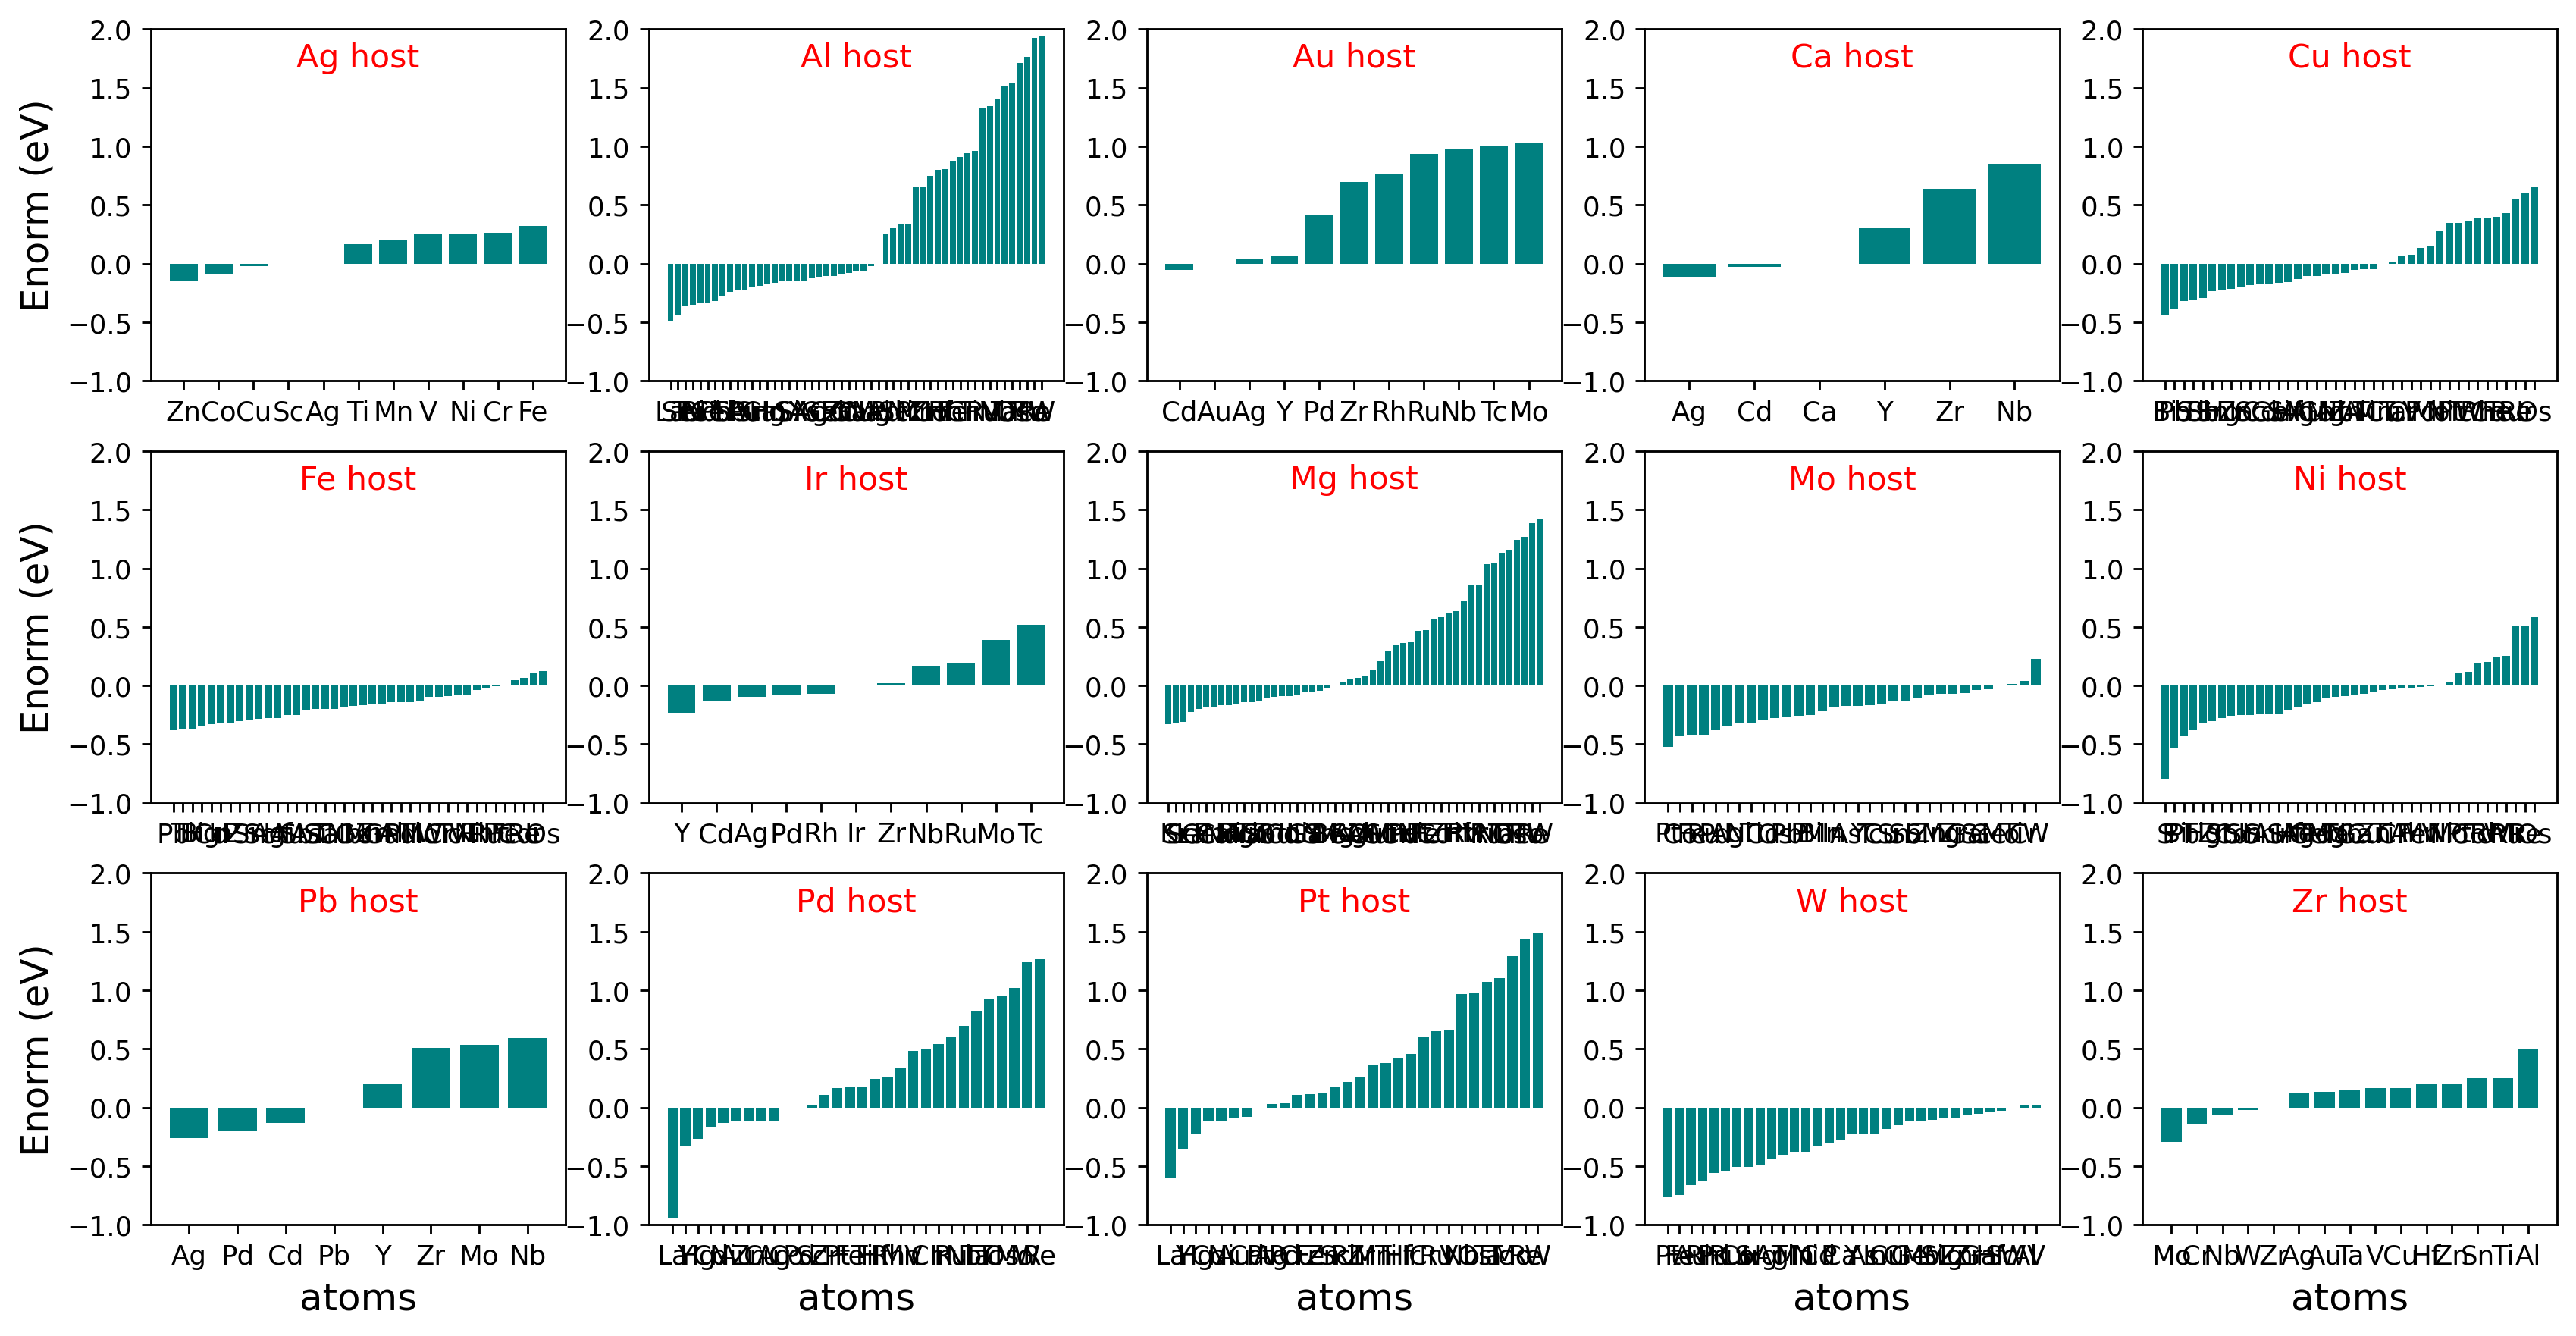

In [10]:
fig, axs = plt.subplots(3, 5, figsize=(16, 8), dpi = 256)
plt.rcParams['axes.titley'] = 1.0
plt.rcParams['axes.titlepad'] = -14
mpl.rcParams.update({'font.size': 8})

count = 0
    
for i in range(3):
    for j in range(5):
        df = data_grp.get_group(x1[count]).sort_values(by='Enorm (eV)')
        axs[i, j].bar(df['Material compositions 2'], df['Enorm (eV)'], color = 'teal')
        axs[i, j].set_title(f'{x1[count]} host', c='red', fontsize=12)
        axs[i, j].set_ylim(-1,2)
        count += 1
        if j == 0:
            axs[i, j].set_ylabel("Enorm (eV)", fontsize=14)        
        if i == 2:
            axs[i, j].set_xlabel("atoms", fontsize=14)
            
plt.savefig('dataset_hist.tif', bbox_inches = 'tight')

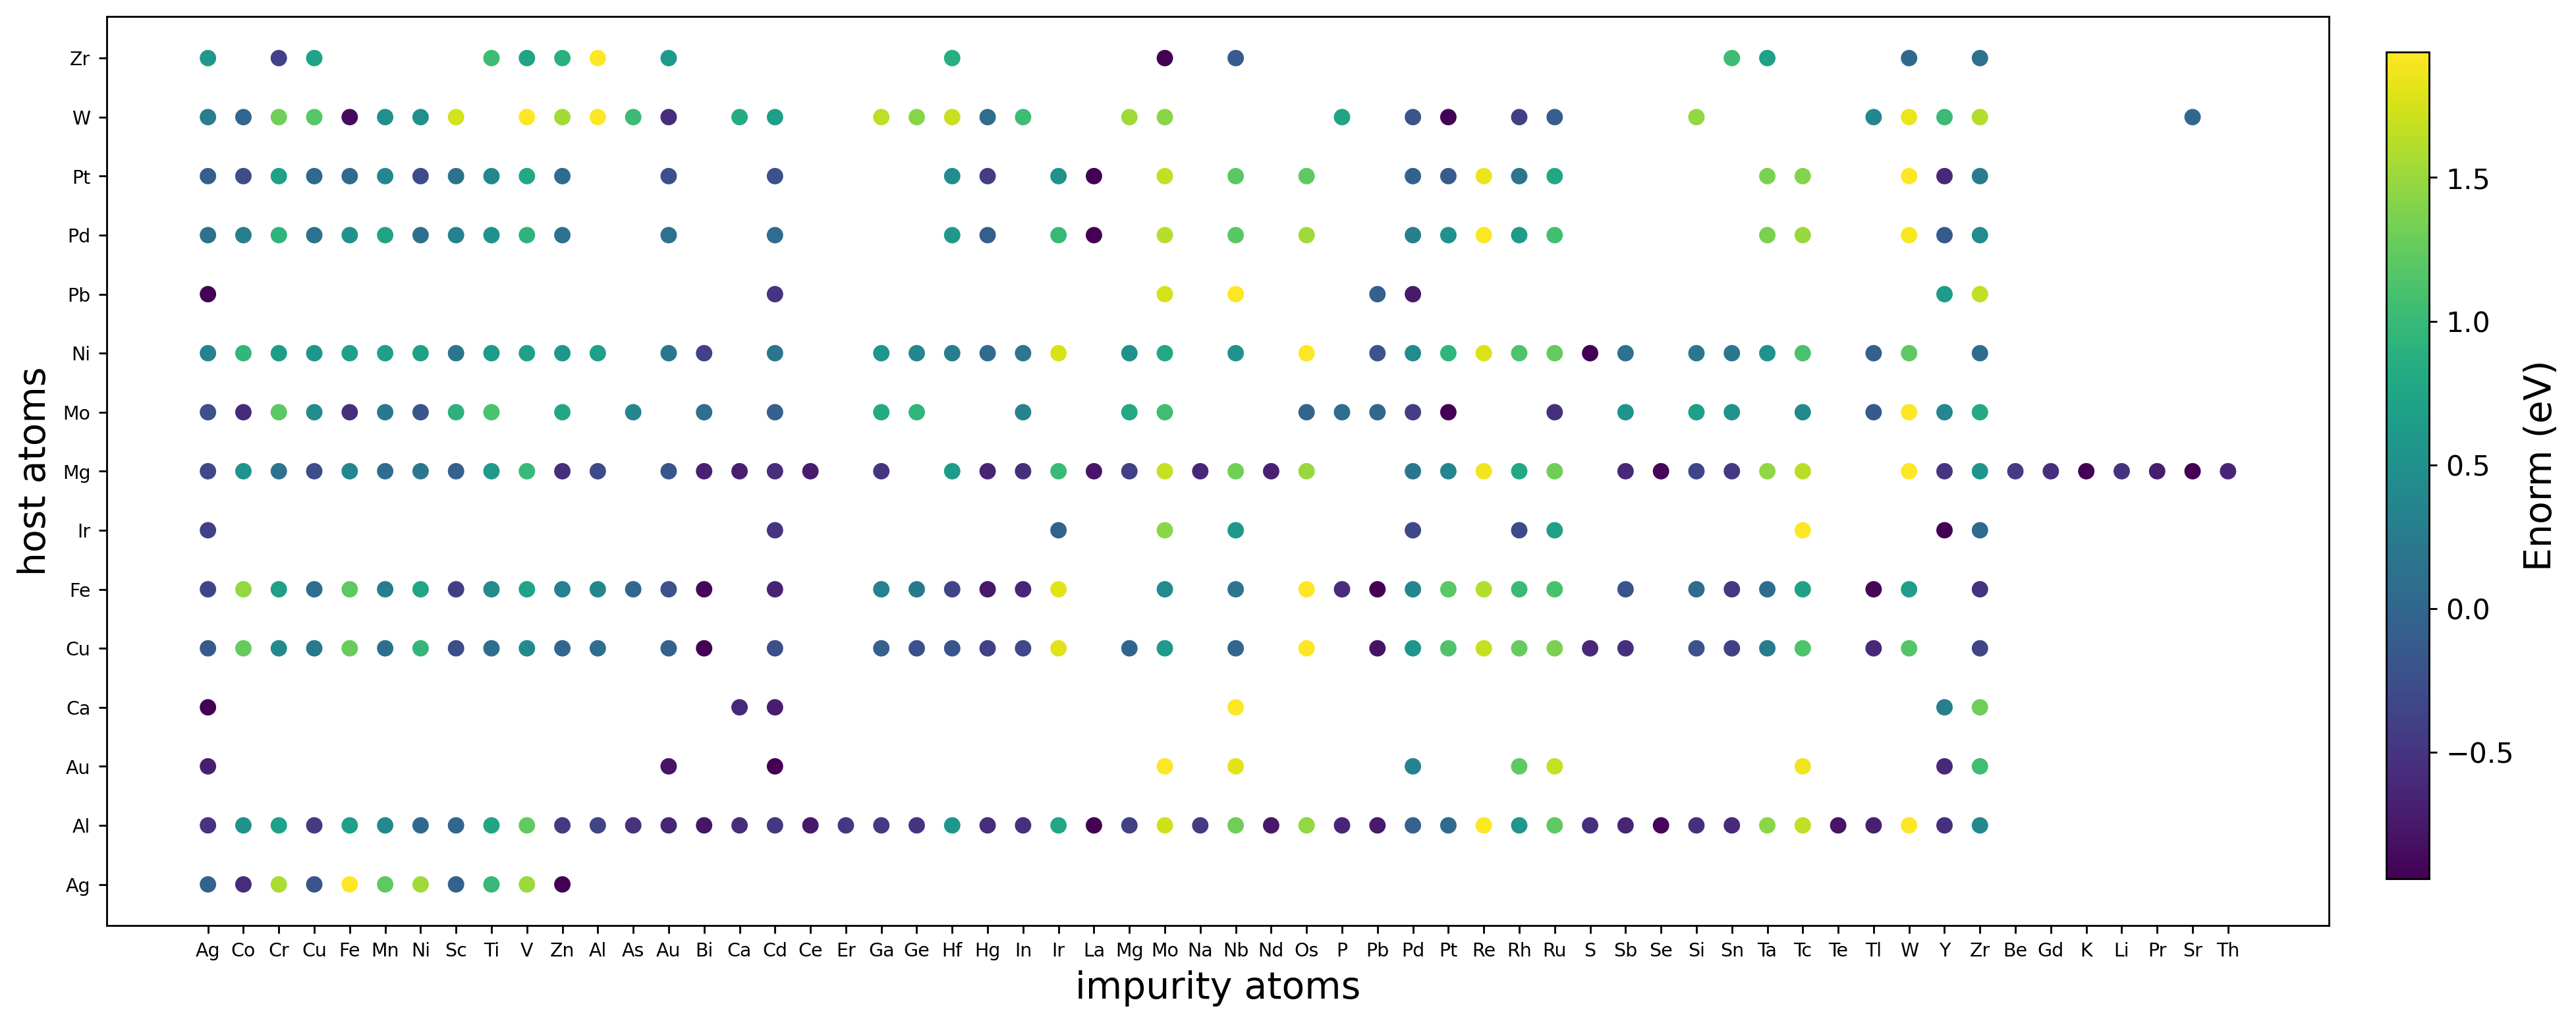

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7), dpi = 256)
mpl.rcParams.update({'font.size': 12})

for atom in x1:
    df = data_grp.get_group(atom)
    ax.scatter(df['Material compositions 2'], df['Material compositions 1'], c=df['Enorm (eV)'])
    
ax.set_xlabel('impurity atoms', fontsize=16)
ax.set_ylabel('host atoms', fontsize=16)

norm = mpl.colors.Normalize(data_new['Enorm (eV)'].min(), data_new['Enorm (eV)'].max())
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
#m.set_array([])

cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])    
cbar = fig.colorbar(m, cax=cbar_ax, shrink=0.1)

cbar.set_label('Enorm (eV)', fontsize=16)

plt.savefig('dataset.tif', bbox_inches = 'tight')

plt.show()

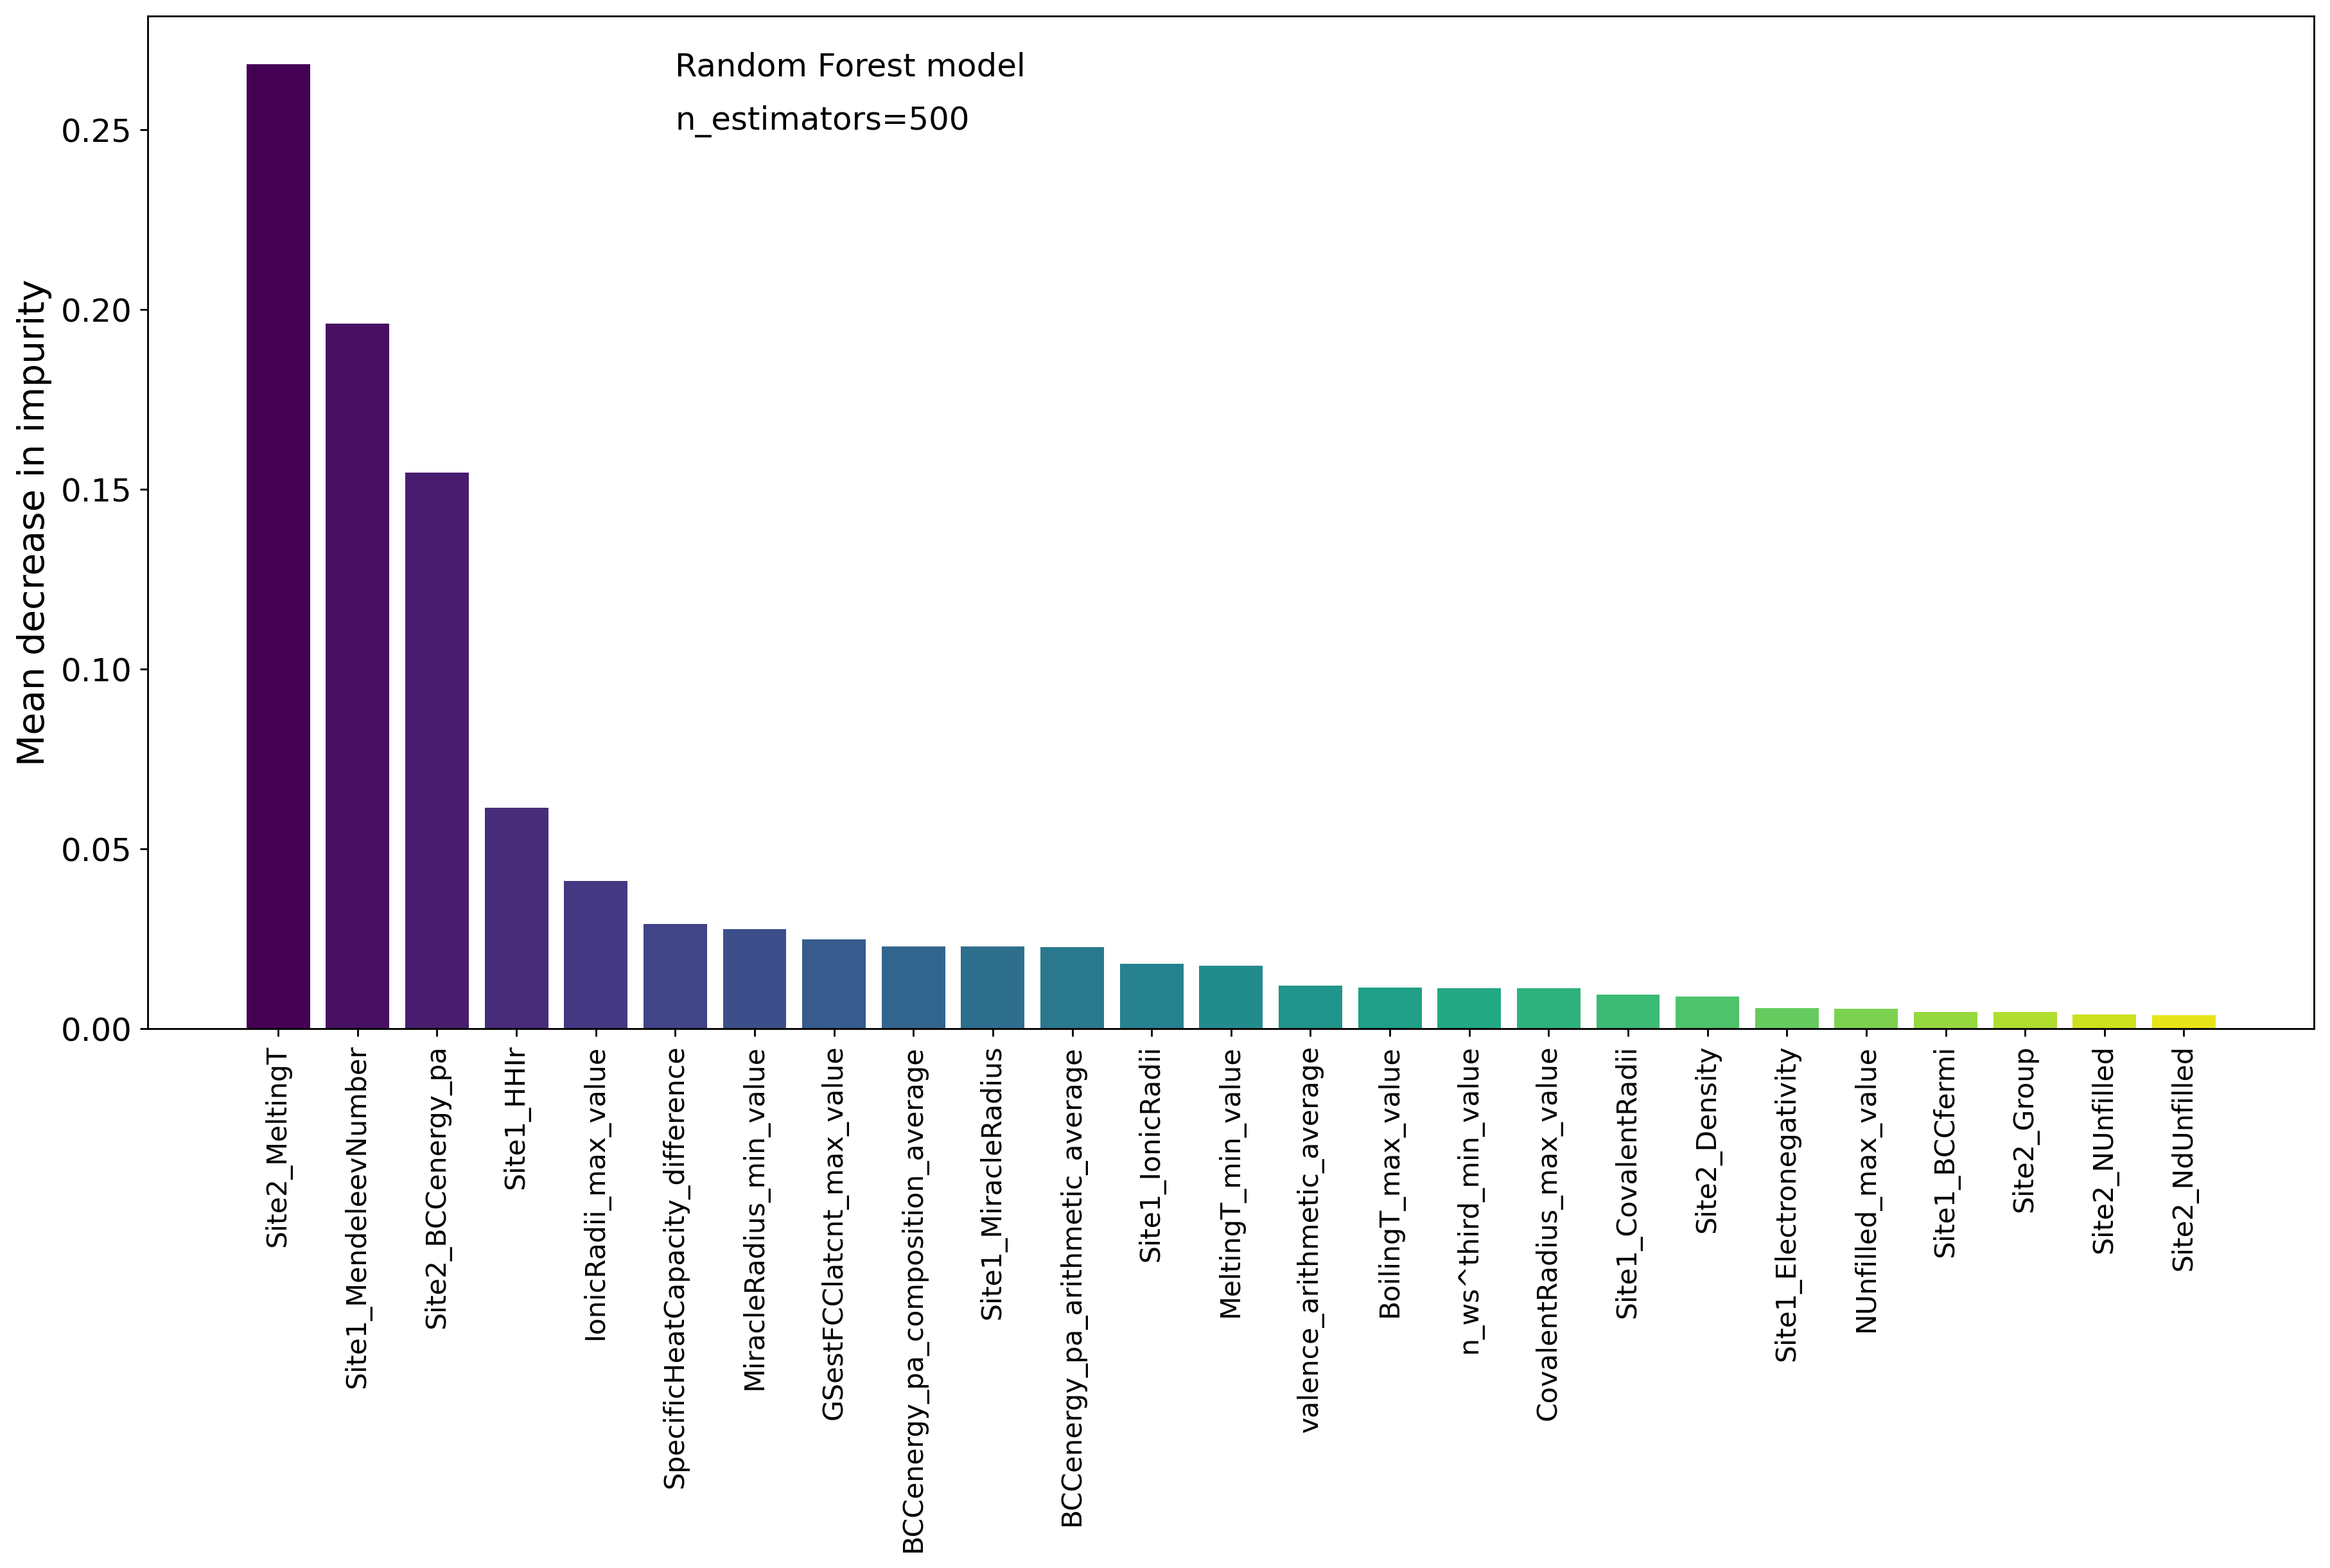

In [12]:
#################################### feature importance ####################################

from sklearn.ensemble import RandomForestRegressor
from matplotlib.cm import get_cmap
from sklearn.preprocessing import MinMaxScaler

mpl.rcParams.update({'font.size': 14})

def plot_cmap(labels, data, ax, chart_type='bar', cmap=None):
    
    # scale data for compatibility with cmap
    den = max(data) - min(data)
    
 #   scaled_data = [(datum-min(data))/den for datum in data]
    scaled_data = [(0.05 + i)/25 for i in range(25)]
    
    # get colors corresponding to data
    colors = []
    my_cmap = get_cmap(cmap)
    
    for decimal in scaled_data:
        colors.append(my_cmap(decimal))
    fig.patch.set_facecolor('white')

    try:
        getattr(ax, chart_type)(labels, data, color=colors)
    
    except:
        getattr(ax, chart_type)(data, labels=labels, colors=colors)
        
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data_new)
data_std = pd.DataFrame(standardized_data, columns=data_new.columns)

x_train = data_std.drop(['Enorm (eV)'],axis=1)
x_names = x_train.columns.unique()
y_train = data_std['Enorm (eV)']

fig, ax_2 = plt.subplots(1,1,figsize=(17, 8), dpi = 256)

forest = RandomForestRegressor(n_estimators=500, random_state=1)

#################################### plot #################################### 

forest_ = forest.fit(x_train, y_train)
        
importances = forest_.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plot_cmap(range(x_train.shape[1]), importances[sorted_indices], ax_2, chart_type='bar', cmap='viridis')
            
ax_2.set_ylabel("Mean decrease in impurity", fontsize=16)
ax_2.set_xticks(range(x_train.shape[1]), x_names[sorted_indices], rotation = 90, fontsize=12)
plt.text(5, 0.25, 'n_estimators=500')
plt.text(5, 0.265, 'Random Forest model')

#plt.savefig('feature importance_2.tif', bbox_inches = 'tight')
plt.show()

In [13]:
selected_features = x_names[sorted_indices][0:13]
selected_features

Index(['Site2_MeltingT', 'Site1_MendeleevNumber', 'Site2_BCCenergy_pa',
       'Site1_HHIr', 'IonicRadii_max_value', 'SpecificHeatCapacity_difference',
       'MiracleRadius_min_value', 'GSestFCClatcnt_max_value',
       'BCCenergy_pa_composition_average', 'Site1_MiracleRadius',
       'BCCenergy_pa_arithmetic_average', 'Site1_IonicRadii',
       'MeltingT_min_value'],
      dtype='object')

In [14]:
######### train model ################
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data_new[selected_features.values].values
y = data_new['Enorm (eV)'].values

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=13)

scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [15]:
######### train linear model ################

from sklearn.linear_model import LinearRegression

linear_ = LinearRegression().fit(x_train_norm, y_train)

mse_linear_train = mse(y_train, linear_.predict(x_train_norm))
mse_linear_test = mse(y_test, linear_.predict(x_test_norm))


print('mse of linear model-train:', mse_linear_train)
print('mse of linear model-test:', mse_linear_test)

mse of linear model-train: 0.062455033215032395
mse of linear model-test: 0.06589121724695997


In [16]:
######### train decision tree model ################

from sklearn.tree import DecisionTreeRegressor

parameters ={
    'min_samples_split':[i for i in range(2,10)],
    'max_depth': [i for i in range(1,10)]
}

DT = DecisionTreeRegressor()

rnd_search_cv_2 = RandomizedSearchCV(estimator=DT,
                                     param_distributions=parameters,
                                     n_iter=2,
                                     cv=5,
                                     verbose=0,
                                     n_jobs=-1,
                                     random_state=13
                                    )

rnd_search_cv_2.fit(x_train_norm, y_train)
opt_params = rnd_search_cv_2.best_params_
print(opt_params)

DT_opt =  DecisionTreeRegressor(min_samples_split=opt_params['min_samples_split'], max_depth=opt_params['max_depth'])
DT_opt.fit(x_train_norm, y_train)

mse_DT_train = mse(y_train, DT_opt.predict(x_train_norm))
mse_DT_test = mse(y_test, DT_opt.predict(x_test_norm))

print('mse of DT model-train:', mse_DT_train)
print('mse of DT model-test:', mse_DT_test)

{'min_samples_split': 5, 'max_depth': 4}
mse of DT model-train: 0.039059786349408765
mse of DT model-test: 0.08756377495624254


In [27]:
######### train ANN model ################
#chose one single hindden layer, adam optimizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

parameters = {
    'activation': ['relu', 'sigmoid', 'tanh', 'LeakyReLU'],
    'units':[i for i in range(6,14)],
    "lr":(0.1,0.03,0.01,0.003,0.001,0.0003,0.0001)
}

def new_func(activation, units, lr):
    model = Sequential()
    model.add(Input(shape=x_train_norm.shape[1]))
    model.add(Dense(units=units, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
    
    return model


estimator = KerasRegressor(build_fn=new_func)
                           
rnd_search_cv_3 = RandomizedSearchCV(estimator=estimator,
                                     param_distributions=parameters,
                                     n_iter=20,
                                     cv=5,
                                     verbose=0,
                                     n_jobs=-1,
                                     random_state=13)

rnd_search_cv_3.fit(x_train_norm, y_train, epochs=50, batch_size=50)

opt_result = rnd_search_cv_3.best_params_
print(opt_result)

C:\Users\phonehouse\AppData\Local\Temp\ipykernel_2604\3202911033.py:25: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=new_func)
exception calling callback for <Future at 0x166f1564580 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\phonehouse\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 407, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\phonehouse\anaconda3\lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "C:\Users\phonehouse\anaconda3\lib\site-packages\keras\__init__.py", line 24, in <module>
    from keras import models
  File "C:\Users\phonehouse\anaconda3\lib\site-package

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.